In [ ]:
# pip install imblearn

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

   id                       date  \
0   2  2022-09-09 03:04:00+00:00   
1   3  2022-09-09 02:15:19+00:00   
2   4  2022-09-08 23:45:04+00:00   
3   5  2022-09-08 19:12:20+00:00   
4   6  2022-09-08 17:48:43+00:00   

                                             content  Emotion  
0  posted reposted from may they rest peace and p...      5.0  
1  reporting today with for the death queen eliza...      3.0  
2  the choir practicing tonight for longplanned m...      3.0  
3         rip your royal majesty cry toronto ontario      7.0  
4  the flags are being lowered half mast after th...      0.0  
----------------------
Total Null values: 21
----------------------
----------------------------------------------
Total Null values after dropping null rows: 0
----------------------------------------------
Length of data set:  4041
Shape of data set:  (4041, 4)
Dataset information
-------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4041 entries, 0 to 4061
Data columns (total 4

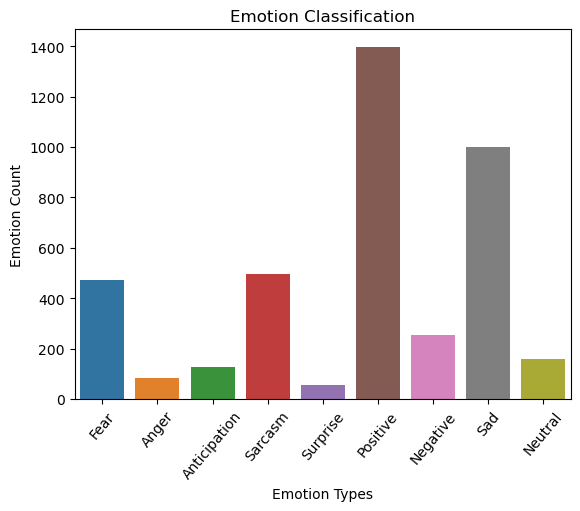

Shape of train data (3232,)
Shape of train data (809,)
No. of feature_words:  20000
No. of feature_words:  3000
Class=0, n=471 (11.656%)
Class=1, n=85 (2.103%)
Class=2, n=127 (3.143%)
Class=3, n=495 (12.249%)
Class=4, n=54 (1.336%)
Class=5, n=1397 (34.571%)
Class=6, n=252 (6.236%)
Class=7, n=1000 (24.746%)
Class=10, n=160 (3.959%)
--------------------
Before oversampling
--------------------
Counter({5.0: 1122, 7.0: 813, 3.0: 392, 0.0: 370, 6.0: 198, 10.0: 120, 2.0: 100, 1.0: 69, 4.0: 48})
--------------------
Class=0, n=370 (11.448%)
Class=1, n=69 (2.135%)
Class=2, n=100 (3.094%)
Class=3, n=392 (12.129%)
Class=4, n=48 (1.485%)
Class=5, n=1122 (34.715%)
Class=6, n=198 (6.126%)
Class=7, n=813 (25.155%)
Class=10, n=120 (3.713%)
--------------------------------
After SMOTE + ENN oversampling - TF-IDF vectorizer
--------------------------------
Class=0, n=1104 (13.852%)
Class=1, n=1121 (14.065%)
Class=2, n=1122 (14.078%)
Class=3, n=778 (9.762%)
Class=4, n=1122 (14.078%)
Class=5, n=159 (1.9

In [2]:
# Get base path
base_path  = os.path.normpath(os.getcwd() + os.sep + os.pardir)

# Set file path
input_file_path = base_path + '\\Preprocessing\\'

%run "{input_file_path}smote_oversampling.ipynb"

In [ ]:
# Test train split

# X_train_tfidf_smote
# X_train_count_smote
# y_train_tfidf_smote
# y_train_count_smote
# X_test_count_vect
# X_test_tfidf_vect
# y_test

In [51]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve, auc, accuracy_score
from yellowbrick.classifier.rocauc import roc_auc

In [38]:
def bestC_for_MultinomialNB(X, y):
    mean_error=[]; std_error=[]
    c=[0.0001, 0.001,0.01,0.1]
    from sklearn.model_selection import KFold
    fold = KFold(n_splits=5, shuffle=True)
    for i in c:
        model = MultinomialNB(alpha=i)
        temp=[]
        kf = KFold(n_splits=5, shuffle = True)
        for train, test in fold.split(X):
            x_train, x_test = X[train], X[test]
            y_train, y_test = y[train], y[test]
            model.fit(x_train, y_train)
            ypred = model.predict(x_test)
            from sklearn.metrics import mean_squared_error
            temp.append(mean_squared_error(y_test,ypred))
        mean_error.append(np.array(temp).mean())
        std_error.append(np.array(temp).std())
    # print(len(mean_error))
    # print(len(std_error))
    plt.errorbar(c,mean_error,yerr=std_error, label = "Mean Error")
    #plt.errorbar(c,std_error,yerr=mean_error, label = "Standard deviation Error")
    plt.xlabel('C', fontweight ='bold'); plt.ylabel('Mean Square Error', fontweight ='bold')
    # xi = list(range(len(c)))
    # plt.xticks(xi, c)
    plt.title("Prediction Error vs C (MultinomialNB)")
    # default_x_ticks = range(len(c))
    # plt.xticks(default_x_ticks, c)
    # plt.xlim((0,5))
    # plt.xlim((0.01, 1))
    plt.legend()
    plt.show()


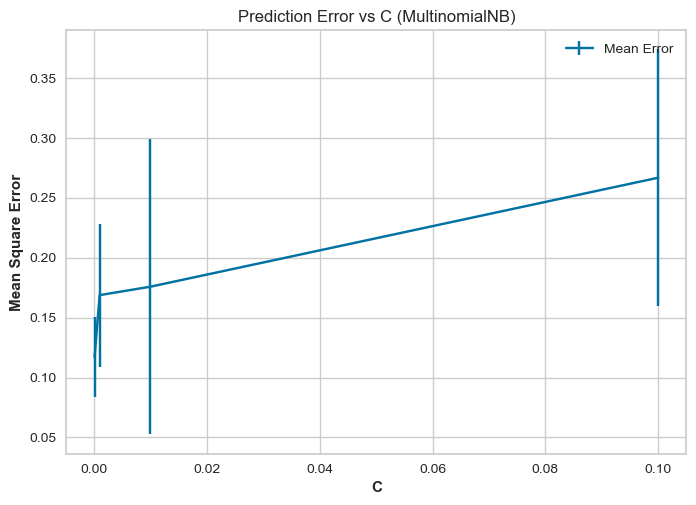

In [39]:
# Using k-Fold cross validation to find best C value for Multinomial Naive Bayes classification
bestC_for_MultinomialNB(X_train_tfidf_smote, y_train_tfidf_smote)

In [40]:
def bestC_for_SGDClassifier(X, y):
    mean_error=[]; std_error=[]
    c=[0.001, 0.01, 0.1, 10, 100, 1000, 10000]
    from sklearn.model_selection import KFold
    fold = KFold(n_splits=5, shuffle=True)
    for i in c:
        model = SGDClassifier(alpha=i)
        temp=[]
        kf = KFold(n_splits=5, shuffle = True)
        for train, test in fold.split(X):
            x_train, x_test = X[train], X[test]
            y_train, y_test = y[train], y[test]
            model.fit(x_train, y_train)
            ypred = model.predict(x_test)
            from sklearn.metrics import mean_squared_error
            temp.append(mean_squared_error(y_test,ypred))
        mean_error.append(np.array(temp).mean())
        std_error.append(np.array(temp).std())
    # print(len(mean_error))
    # print(len(std_error))
    plt.errorbar(c,mean_error,yerr=std_error, label = "Mean Error")
    #plt.errorbar(c,std_error,yerr=mean_error, label = "Standard deviation Error")
    plt.xlabel('C', fontweight ='bold'); plt.ylabel('Mean Square Error', fontweight ='bold')
    # xi = range(len(c))
    # plt.xticks(xi, c)
    plt.title("Prediction Error vs C(SGDClassifier)")
    # default_x_ticks = range(len(c))
    # plt.xticks(default_x_ticks, c)
    # plt.xlim((0,100))
    # plt.margins(x=0.1, y=0.05)
    # plt.xlim((0.01, 1))
    plt.legend()
    plt.show()


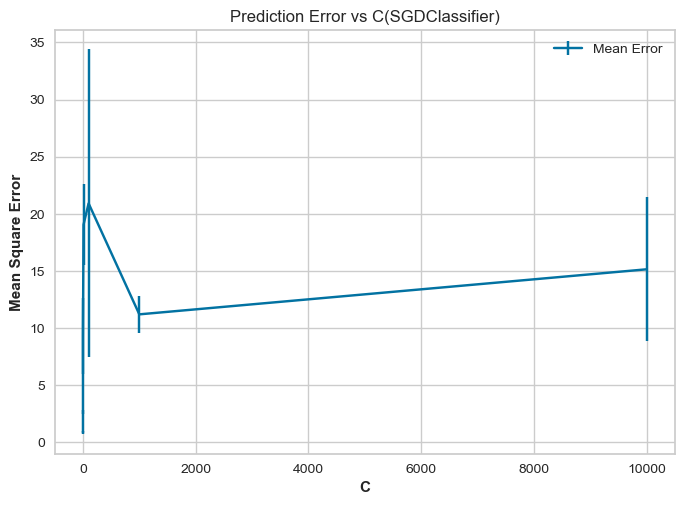

In [41]:
bestC_for_SGDClassifier(X_train_tfidf_smote, y_train_tfidf_smote)

In [ ]:
# X_train_tfidf_smote

# y_train_tfidf_smote

# X_test_tfidf_vect
# y_test

In [8]:
# voting classifier
voting_clf = VotingClassifier(estimators=[
    ('nb', MultinomialNB(alpha= 0.001)),
    ('rf', RandomForestClassifier()),
    ('svm', SGDClassifier(alpha = 0.01))])


In [12]:
voting_clf.fit(X_train_tfidf_smote, y_train_tfidf_smote)

VotingClassifier(estimators=[('nb', MultinomialNB(alpha=0.001)),
                             ('rf', RandomForestClassifier()),
                             ('svm', SGDClassifier(alpha=0.001))])

In [13]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test_tfidf_vect, y_test))

nb = 0.2904820766378245
rf = 0.12484548825710753
svm = 0.08405438813349815


In [14]:
y_predicted = voting_clf.predict(X_test_tfidf_vect)

In [15]:
voting_clf.score(X_test_tfidf_vect, y_test)

0.12484548825710753

In [16]:
def plot_confusion_matirx(y_test, y_pred):
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
   
    cm_df = pd.DataFrame(cf_matrix,
                     index = ['Fear','Anger', 'Anticipation', 'Sarcasm', 'Surprise', 'Positive', 'Negative', 'Sad', 'Neutral'], 
                     columns = ['Fear','Anger', 'Anticipation', 'Sarcasm', 'Surprise', 'Positive', 'Negative', 'Sad', 'Neutral'])    

    fig = plt.figure()
    sns.heatmap(cm_df, annot=True, cmap = 'Blues')
    plt.xlabel("Predicted values")
    plt.ylabel("Actual values" )
    plt.title ("Confusion Matrix")
    plt.show()

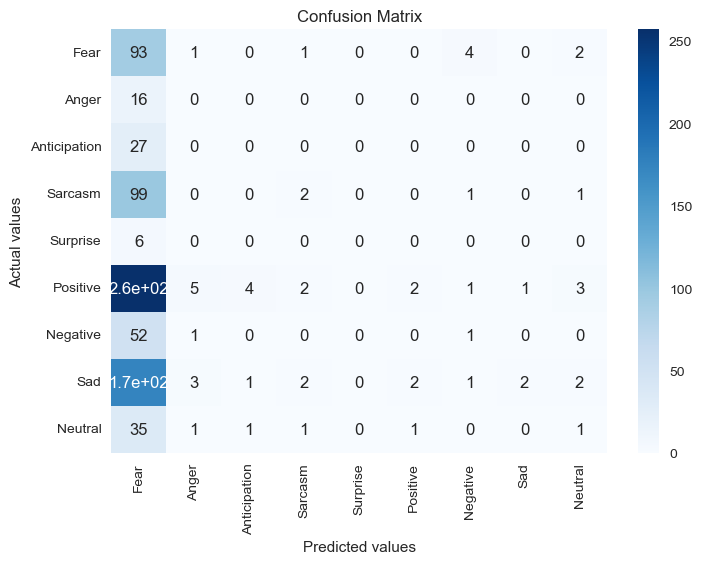

In [17]:
plot_confusion_matirx(y_test, y_predicted)

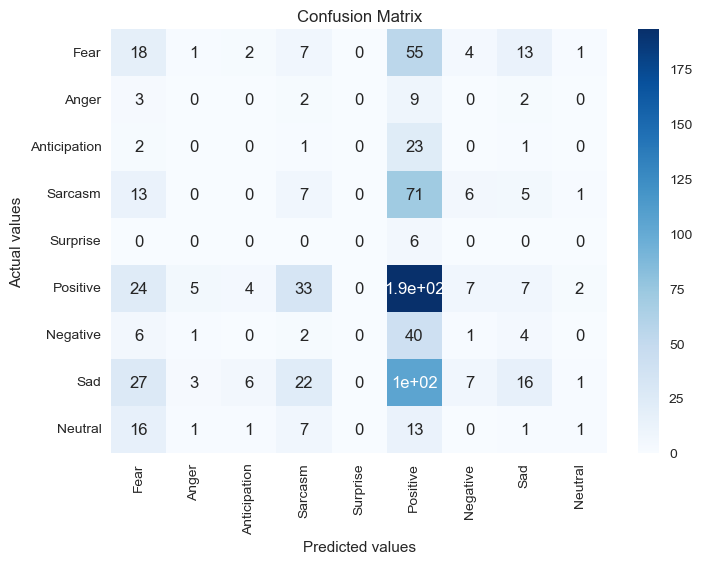

In [48]:
MNBmodel = MultinomialNB(alpha= 0.001).fit(X_train_tfidf_smote, y_train_tfidf_smote)
MNB_predict = MNBmodel.predict(X_test_tfidf_vect)
plot_confusion_matirx(y_test, MNB_predict)

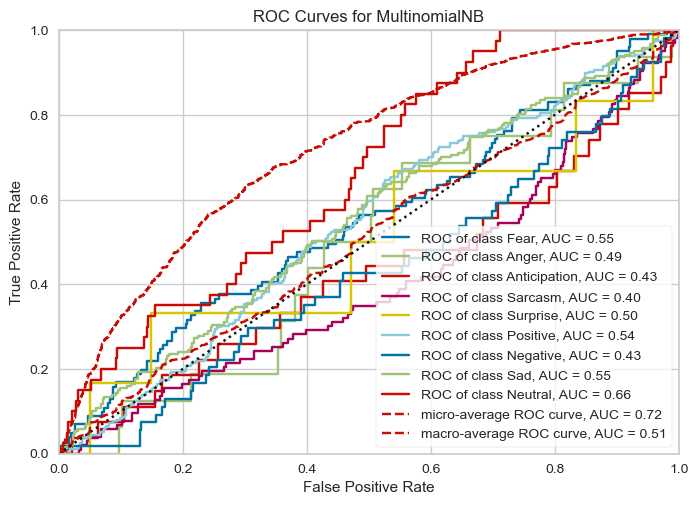

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Fear', 'Anger', 'Anticipation', 'Sarcasm', 'Surprise',
                'Positive', 'Negative', 'Sad', 'Neutral'],
       estimator=MultinomialNB(alpha=0.001))

In [19]:
# plot_ROC_curve
roc_auc(MNBmodel, X_train_tfidf_smote, y_train_tfidf_smote, X_test=X_test_tfidf_vect, y_test=y_test, 
classes=['Fear','Anger','Anticipation','Sarcasm','Surprise','Positive','Negative','Sad','Neutral'])

In [54]:
print('Multinomial Naive Bayes tfidf accuracy: %s' % accuracy_score(y_test, MNB_predict))

Multinomial Naive Bayes tfidf accuracy: 0.29171817058096416


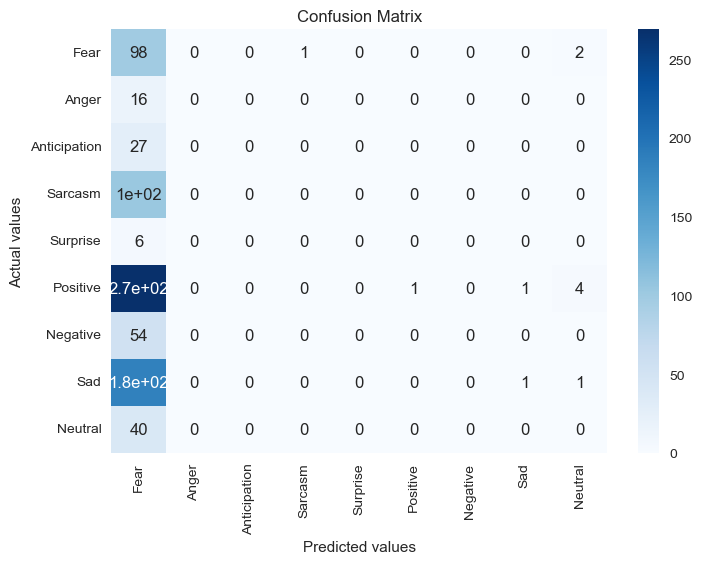

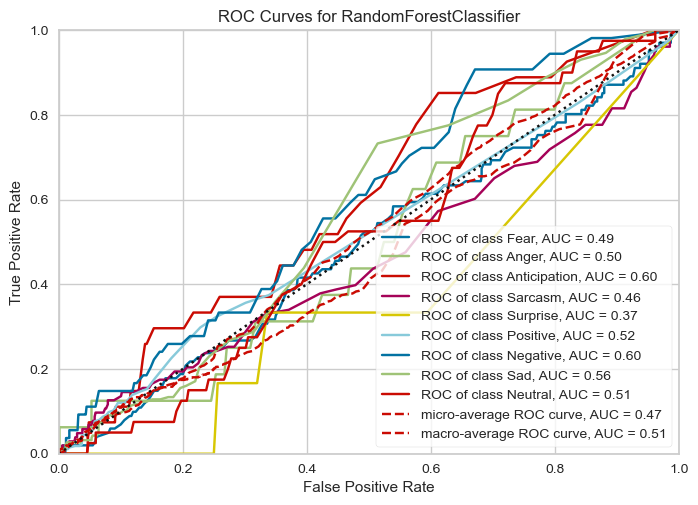

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Fear', 'Anger', 'Anticipation', 'Sarcasm', 'Surprise',
                'Positive', 'Negative', 'Sad', 'Neutral'],
       estimator=RandomForestClassifier(n_estimators=1000))

In [59]:
RFclfr = RandomForestClassifier(n_estimators=1000).fit(X_train_tfidf_smote, y_train_tfidf_smote)
RFclfr_predict = RFclfr.predict(X_test_tfidf_vect)
plot_confusion_matirx(y_test, RFclfr_predict)
roc_auc(RFclfr, X_train_tfidf_smote, y_train_tfidf_smote, X_test=X_test_tfidf_vect, y_test=y_test, 
classes=['Fear','Anger','Anticipation','Sarcasm','Surprise','Positive','Negative','Sad','Neutral'])

In [60]:
print('Random Forest tfidf accuracy: %s' % accuracy_score(y_test, RFclfr_predict))

Random Forest tfidf accuracy: 0.12360939431396786


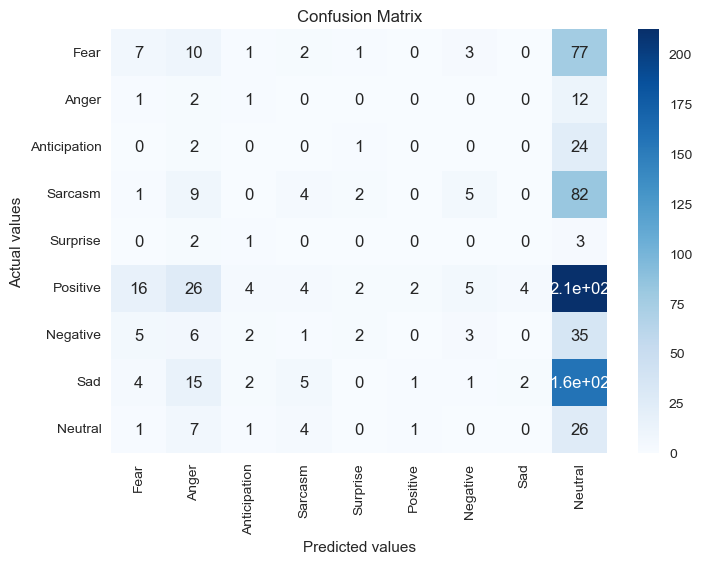

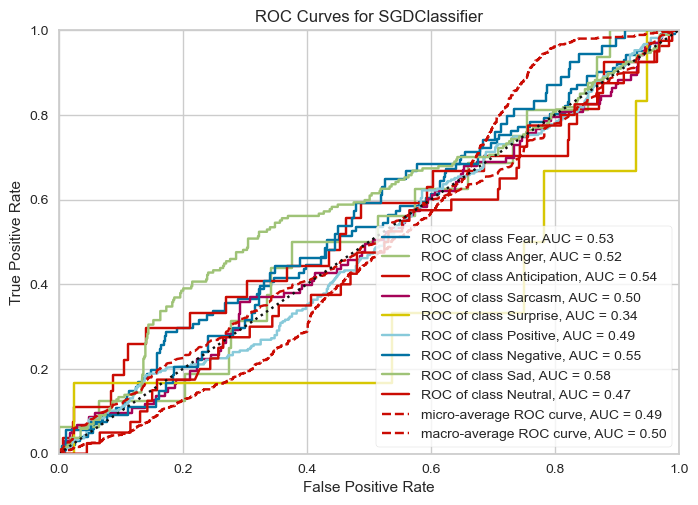

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for SGDClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Fear', 'Anger', 'Anticipation', 'Sarcasm', 'Surprise',
                'Positive', 'Negative', 'Sad', 'Neutral'],
       estimator=SGDClassifier(alpha=0.01))

In [57]:
SGDclfr = SGDClassifier(alpha = 0.01).fit(X_train_tfidf_smote, y_train_tfidf_smote)
SGDclfr_predict = SGDclfr.predict(X_test_tfidf_vect)
plot_confusion_matirx(y_test, SGDclfr_predict)
roc_auc(SGDclfr, X_train_tfidf_smote, y_train_tfidf_smote, X_test=X_test_tfidf_vect, y_test=y_test, 
classes=['Fear','Anger','Anticipation','Sarcasm','Surprise','Positive','Negative','Sad','Neutral'])

In [58]:
print('SGDClassifier tfidf accuracy: %s' % accuracy_score(y_test, SGDclfr_predict))

SGDClassifier tfidf accuracy: 0.05686032138442522
